# 공공 인공지능 Open API 활용

## 객체 검출(Object Detection)

In [1]:
with open('etriaikey.txt') as kfile:
    eai_key = kfile.read()

In [3]:
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [4]:
import os
image_file = 'img/park1.jpg'
_, image_type = os.path.splitext(image_file)
image_type

'.jpg'

In [5]:
image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
image_type

'jpg'

In [6]:
with open(image_file, 'rb') as file:
    image_contents = base64.b64encode(file.read()).decode('utf8')

In [7]:
request_json = {
    "request_id": "reserved field",
    "access_key": eai_key,
    "argument": {
        "file": image_contents,
        "type": image_type
    }
}

In [8]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [9]:
print("[responseCode]", response.status)

[responseCode] 200


In [10]:
response.data

b'{"request_id":"reserved field","result":0,"return_type":"com.google.gson.JsonObject","return_object":{"data":[{"class":"person","confidence":"0.947727","x":"212","y":"83","width":"30","height":"77"},{"class":"person","confidence":"0.929976","x":"286","y":"78","width":"20","height":"64"},{"class":"person","confidence":"0.921135","x":"242","y":"83","width":"25","height":"75"},{"class":"person","confidence":"0.835378","x":"255","y":"91","width":"16","height":"60"},{"class":"person","confidence":"0.804656","x":"302","y":"77","width":"15","height":"57"},{"class":"elephant","confidence":"0.998001","x":"27","y":"41","width":"95","height":"73"}]}}'

In [11]:
result = json.loads(response.data)
result

{'request_id': 'reserved field',
 'result': 0,
 'return_type': 'com.google.gson.JsonObject',
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.947727',
    'x': '212',
    'y': '83',
    'width': '30',
    'height': '77'},
   {'class': 'person',
    'confidence': '0.929976',
    'x': '286',
    'y': '78',
    'width': '20',
    'height': '64'},
   {'class': 'person',
    'confidence': '0.921135',
    'x': '242',
    'y': '83',
    'width': '25',
    'height': '75'},
   {'class': 'person',
    'confidence': '0.835378',
    'x': '255',
    'y': '91',
    'width': '16',
    'height': '60'},
   {'class': 'person',
    'confidence': '0.804656',
    'x': '302',
    'y': '77',
    'width': '15',
    'height': '57'},
   {'class': 'elephant',
    'confidence': '0.998001',
    'x': '27',
    'y': '41',
    'width': '95',
    'height': '73'}]}}

In [12]:
obj_list = result['return_object']['data']
obj_list

[{'class': 'person',
  'confidence': '0.947727',
  'x': '212',
  'y': '83',
  'width': '30',
  'height': '77'},
 {'class': 'person',
  'confidence': '0.929976',
  'x': '286',
  'y': '78',
  'width': '20',
  'height': '64'},
 {'class': 'person',
  'confidence': '0.921135',
  'x': '242',
  'y': '83',
  'width': '25',
  'height': '75'},
 {'class': 'person',
  'confidence': '0.835378',
  'x': '255',
  'y': '91',
  'width': '16',
  'height': '60'},
 {'class': 'person',
  'confidence': '0.804656',
  'x': '302',
  'y': '77',
  'width': '15',
  'height': '57'},
 {'class': 'elephant',
  'confidence': '0.998001',
  'x': '27',
  'y': '41',
  'width': '95',
  'height': '73'}]

In [13]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

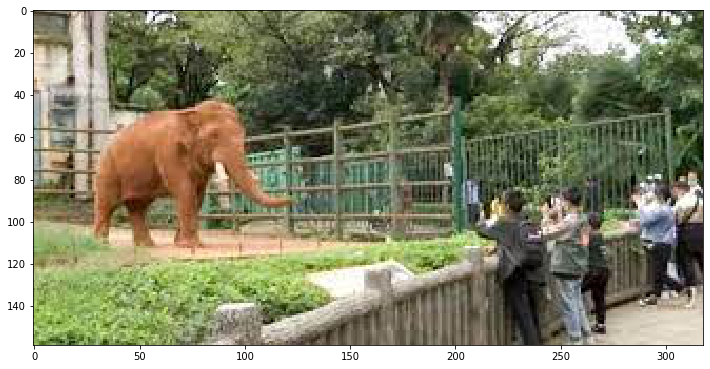

In [15]:
image = Image.open(image_file)
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()

In [16]:
draw = ImageDraw.Draw(image)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf', 20), fill=(255,0,0))
    draw.rectangle(((x, y), (x+w, y+h)), outline=(255,0,0), width=2)

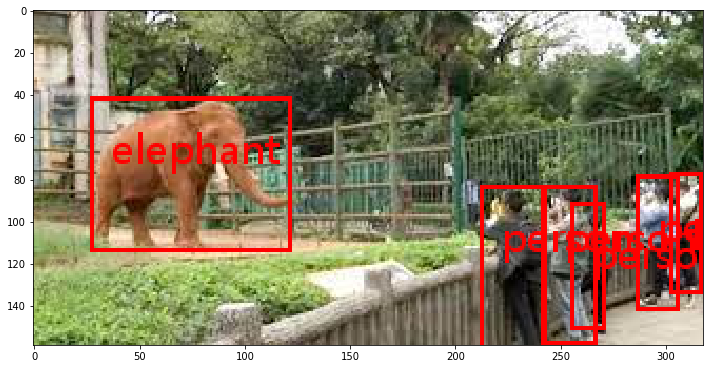

In [17]:
plt.figure(figsize=(12,8))
plt.imshow(image)
plt.show()

In [18]:
image.save('img/object1.'+image_type)

### 여러개의 그림 객체검출하기

In [20]:
from glob import glob

for file in glob('img/park*'):
    print(file)

img\park1.jpg
img\park2.jpg
img\park3.jpg


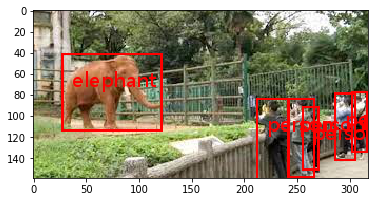

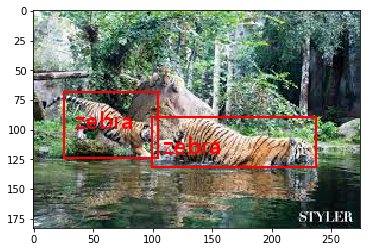

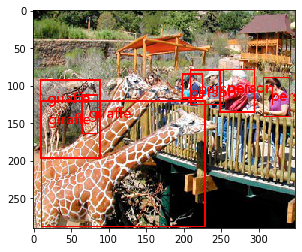

In [21]:
for image_file in glob('img/park*'):
    _, image_type = os.path.splitext(image_file)
    image_type = 'jpg' if image_type == '.jfif' else image_type[1:]
    with open(image_file, 'rb') as file:
        image_contents = base64.b64encode(file.read()).decode('utf8')

    request_json = {
        "request_id": "reserved field",
        "access_key": eai_key,
        "argument": {
            "file": image_contents,
            "type": image_type
        }
    }
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(request_json)
    )

    result = json.loads(response.data)
    obj_list = result['return_object']['data']

    image = Image.open(image_file)
    draw = ImageDraw.Draw(image)
    for obj in obj_list:
        name = obj['class']
        x = int(obj['x'])
        y = int(obj['y'])
        w = int(obj['width'])
        h = int(obj['height'])
        draw.text((x+10,y+10), name, font=ImageFont.truetype('malgun.ttf', 20), fill=(255,0,0))
        draw.rectangle(((x, y), (x+w, y+h)), outline=(255,0,0), width=2)

    plt.imshow(image)
    plt.show()